In [1]:
!pip install nltk spacy requests
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import requests
import re

def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text
        clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
        corpus.append(clean_text)

    return corpus

urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]

texts = load_texts(urls)

In [3]:
for i, text in enumerate(texts):
    print(f"First 200 characters of book {i+1}:\n{text[:200]}\n")

def clean_text(text):
    start_index = text.find("START") + 5
    end_index = text.find("END") - 5
    return text[start_index:end_index]

texts = [clean_text(text) for text in texts]

First 200 characters of book 1:
The Project Gutenberg eBook of Alices Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no

First 200 characters of book 2:
The Project Gutenberg eBook of Through the LookingGlass
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restri

First 200 characters of book 3:
The Project Gutenberg eBook of A Tangled Tale
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
wh



In [4]:
import nltk
nltk.download('punkt')

tokenized_texts = [nltk.word_tokenize(text) for text in texts]

for i, tokens in enumerate(tokenized_texts):
    print(f"First 150 tokens of book {i+1}:\n{tokens[:150]}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


First 150 tokens of book 1:
['OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her',

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered_texts = []
for tokens in tokenized_texts:
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    filtered_texts.append(filtered_text)

print(filtered_texts[0][:50])
print("Stopword 'i' count:", filtered_texts[0].count('i'))

['PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'RabbitHole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'CHAPTER', 'IV', 'Rabbit', 'Sends', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'CHAPTER', 'VII', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'Queens', 'CroquetGround', 'CHAPTER']
Stopword 'i' count: 0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_texts = [[ps.stem(word) for word in text] for text in filtered_texts]

for i, stemmed_tokens in enumerate(stemmed_texts):
    print(f"First 50 stemmed tokens of book {i+1}:\n{stemmed_tokens[:50]}\n")

First 50 stemmed tokens of book 1:
['project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground', 'chapter']

First 50 stemmed tokens of book 2:
['project', 'gutenberg', 'ebook', 'lookingglass', 'illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tigerlili', 'r', 'queen', 'w', 'k

In [7]:
import spacy

nlp = spacy.load('en_core_web_sm')

lemmatized_texts = []
for text in filtered_texts:
    doc = nlp(' '.join(text))
    lemmatized_texts.append([token.lemma_ for token in doc])

for i, lemmatized_tokens in enumerate(lemmatized_texts):
    print(f"First 50 lemmatized tokens of book {i+1}:\n{lemmatized_tokens[:50]}\n")

First 50 lemmatized tokens of book 1:
['PROJECT', 'GUTENBERG', 'ebook', 'ALICES', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'RabbitHole', 'chapter', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'chapter', 'IV', 'Rabbit', 'send', 'Little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'TeaParty', 'chapter', 'VIII', 'Queens', 'CroquetGround', 'chapter']

First 50 lemmatized tokens of book 2:
['PROJECT', 'GUTENBERG', 'EBOOK', 'LOOKINGGLASS', 'Illustration', 'LOOKINGGLASS', 'Alice', 'find', 'Lewis', 'Carroll', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'arrange', 'commencement', 'game', 'WHITE', 'RED', 'PIECES', 'pawns', 'pawn', 'piece', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpenter', 'Sheep', 'Oyster', 'Oyster', 'Walrus'

Step 8: Analyze the Difference Between Stemmed and Lemmatized Tokens
Discuss the differences observed between the stemmed and lemmatized tokens.

In [8]:
nltk.download('averaged_perceptron_tagger')

pos_tagged_texts = [nltk.pos_tag(text) for text in filtered_texts]

for i, pos_tags in enumerate(pos_tagged_texts):
    print(f"First 50 POS tags of book {i+1}:\n{pos_tags[:50]}\n")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


First 50 POS tags of book 1:
[('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('ALICES', 'NNP'), ('ADVENTURES', 'NNP'), ('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NNP'), ('RabbitHole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('Pool', 'NNP'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('CaucusRace', 'NNP'), ('Long', 'NNP'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('Rabbit', 'NNP'), ('Sends', 'NNP'), ('Little', 'NNP'), ('Bill', 'NNP'), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP'), ('Pepper', 'NNP'), ('CHAPTER', 'NNP'), ('VII', 'NNP'), ('Mad', 'NNP'), ('TeaParty', 'NNP'), ('CHAPTER', 'NNP'), ('VIII', 'NNP'), ('Queens', 'NNP'), ('CroquetGround', 'NNP'), ('CHAPTER', 'NNP'

In [9]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

entities_texts = []
for tokens in pos_tagged_texts:
    entities = nltk.ne_chunk(tokens)
    entities_texts.append(entities)

for i, entities in enumerate(entities_texts):
    print(f"Entities in book {i+1}:\n{entities[:50]}\n")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Entities in book 1:
[Tree('ORGANIZATION', [('PROJECT', 'NNP')]), Tree('ORGANIZATION', [('GUTENBERG', 'NNP')]), ('EBOOK', 'NNP'), ('ALICES', 'NNP'), Tree('ORGANIZATION', [('ADVENTURES', 'NNP')]), Tree('ORGANIZATION', [('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP')]), Tree('PERSON', [('Lewis', 'NNP'), ('Carroll', 'NNP')]), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NNP'), Tree('ORGANIZATION', [('RabbitHole', 'NNP')]), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('Pool', 'NNP'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('CaucusRace', 'NNP'), ('Long', 'NNP'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), Tree('PERSON', [('Rabbit', 'NNP'), ('Sends', 'NNP'), ('Little', 'NNP')]), Tree('PERSON', [('Bill', 'NNP')]), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP'), Tree('PERSON', [('Pepper',

In [13]:
!pip install wordcloud matplotlib

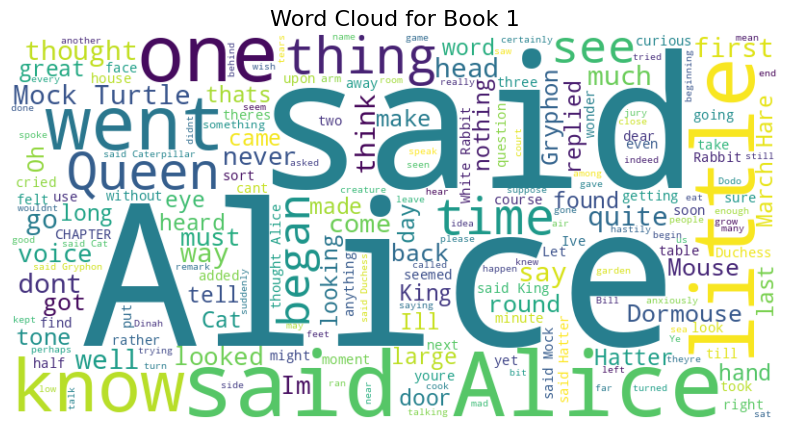

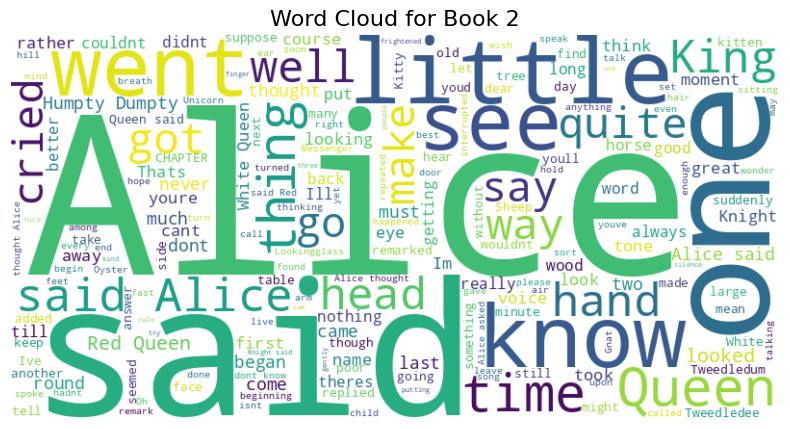

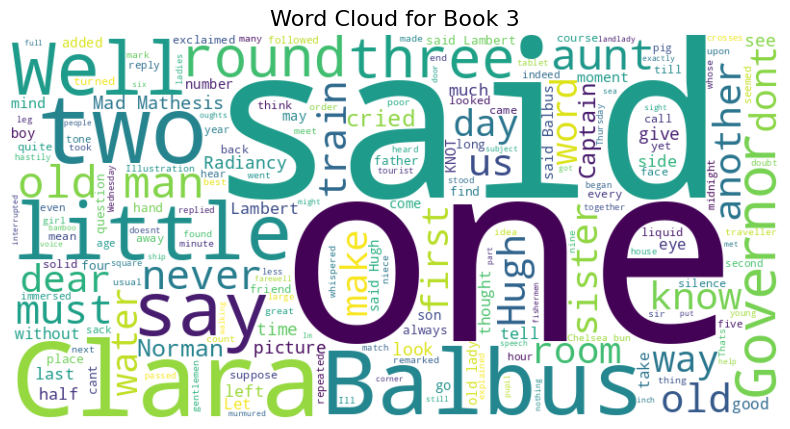

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

for i, text in enumerate(filtered_texts):
    joined_text = ' '.join(text)
    generate_wordcloud(joined_text, f'Word Cloud for Book {i+1}')

In [15]:
lemmatized_texts_joined = [' '.join(text) for text in lemmatized_texts]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmatized_texts_joined)
word_freq = np.asarray(X.sum(axis=0)).flatten()
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_freq))
most_frequent_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("The five most frequent words in all the books are:")
for word, freq in most_frequent_words:
    print(f"{word}: {freq} occurrences")

The five most frequent words in all the books are:
say: 1222 occurrences
alice: 830 occurrences
not: 599 occurrences
go: 362 occurrences
one: 346 occurrences


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmatized_texts_joined)
X_dense = X.toarray()
words = vectorizer.get_feature_names_out()

print("Bag of Words (BoW) Matrix:")
print(X_dense)
print("\nWords corresponding to BoW matrix columns:")
print(words)

Bag of Words (BoW) Matrix:
[[0 1 1 ... 1 0 0]
 [0 0 6 ... 0 0 0]
 [1 0 0 ... 0 2 3]]

Words corresponding to BoW matrix columns:
['abandon' 'abide' 'able' ... 'zigzag' 'zuzu' 'zuzus']


The five most frequent words in all the books are:
say: 1222 occurrences
alice: 830 occurrences
not: 599 occurrences
go: 362 occurrences
one: 346 occurrences


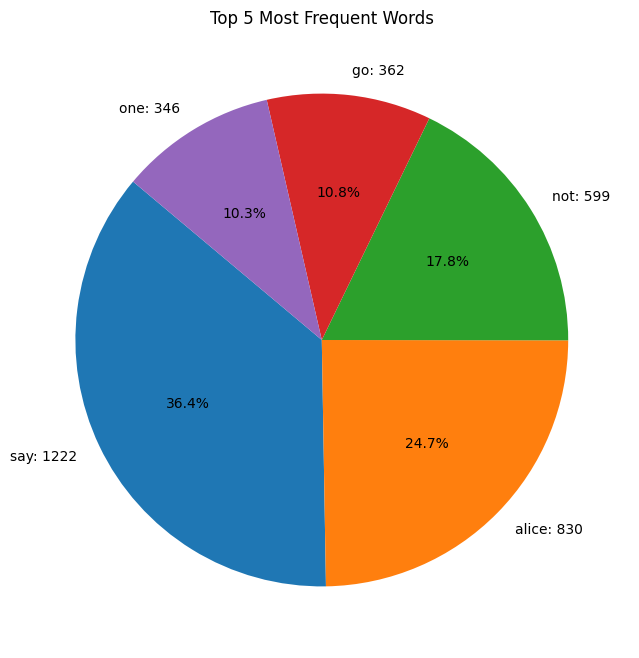

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmatized_texts_joined)
word_freq = np.asarray(X.sum(axis=0)).flatten()
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_freq))
most_frequent_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:5]
words, frequencies = zip(*most_frequent_words)
print("The five most frequent words in all the books are:")
for word, freq in most_frequent_words:
    print(f"{word}: {freq} occurrences")

labels = [f"{word}: {freq}" for word, freq in most_frequent_words]
plt.figure(figsize=(8, 8))
plt.pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Frequent Words')
plt.show()

"say" (1222 occurrences):

What it means: This word shows up a lot because the characters are often talking. It’s common in stories where people speak a lot, so it’s not surprising.
Expected?: Yes, very much so. In a book with lots of dialogue, "say" would naturally be frequent.

"alice" (830 occurrences):

What it means: Alice is the main character, so it makes sense that her name is one of the most frequent words. It shows she’s at the center of the story.
Expected?: Definitely. Since the books are about Alice’s adventures, her name being common is exactly what you’d expect.

"not" (599 occurrences):

What it means: "Not" is used for negation, like saying something didn’t happen. It’s a word that’s common in most texts, so it doesn’t tell us much about the story itself.
Expected?: Yes.

"go" (362 occurrences):

What it means: "Go" suggests that there’s a lot of movement or action in the story, which fits well with the idea of adventures.
Expected?: Yes, because in a story where characters move around a lot.

"one" (346 occurrences):

What it means: "One" is a versatile word that can be used in many ways, like referring to a single thing or person. It’s common but doesn’t reveal much about the story’s deeper meaning.
Expected?: Yes.

Summary
The most frequent words give a basic idea of what’s happening in the books—lots of talking, Alice being the main focus, and plenty of action. These words are expected in these stories, but they don’t tell us anything surprising or deep about the themes. They are more about how the story is told than what it’s really about.

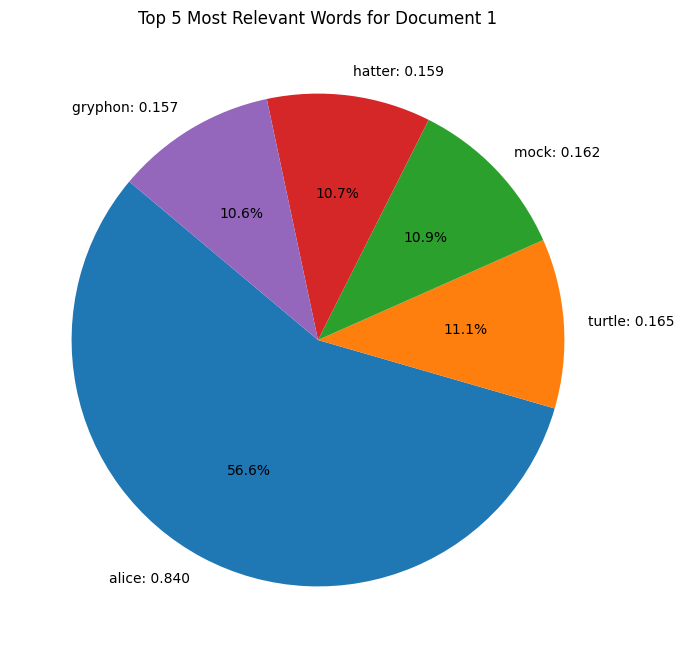

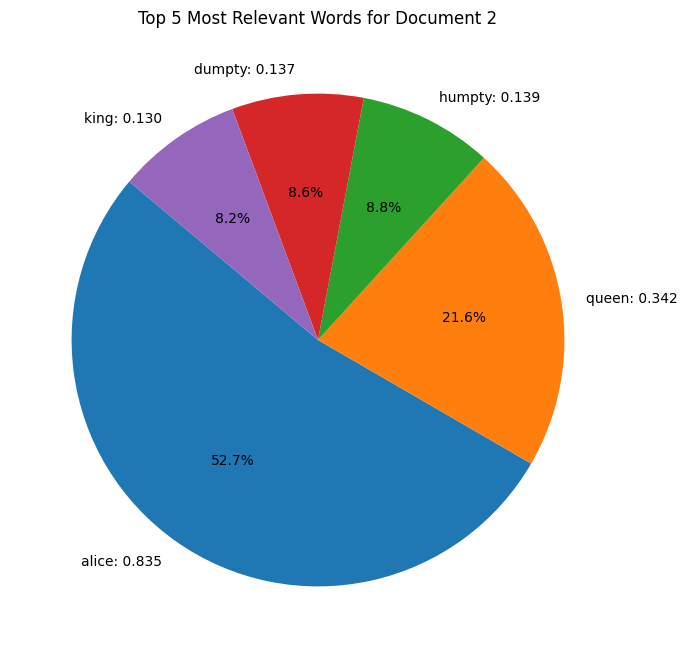

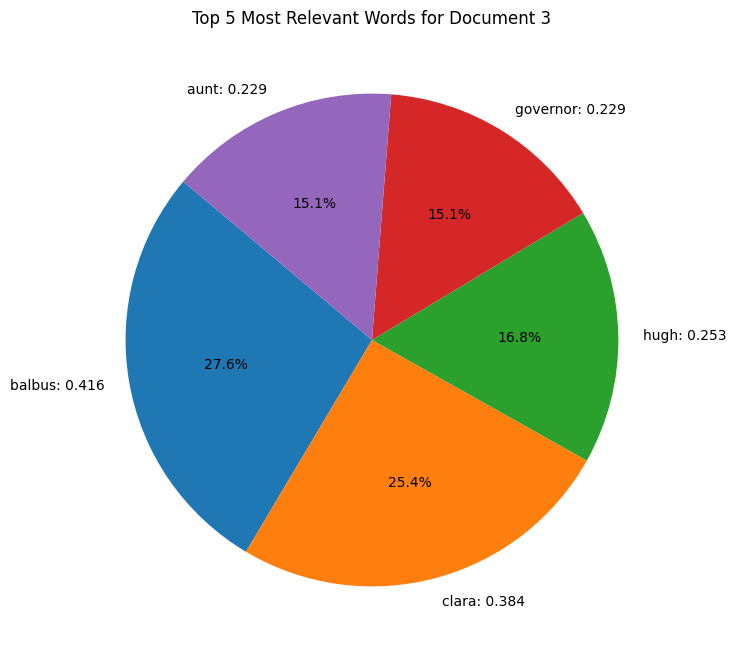

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(lemmatized_texts_joined)
X_tfidf_dense = X_tfidf.toarray()
words_tfidf = tfidf_vectorizer.get_feature_names_out()

def plot_tfidf_pie_chart(document_index):
    doc_tfidf_scores = X_tfidf_dense[document_index]
    top_indices = np.argsort(doc_tfidf_scores)[-5:][::-1]
    top_words = [words_tfidf[i] for i in top_indices]
    top_scores = [doc_tfidf_scores[i] for i in top_indices]
    labels = [f"{word}: {score:.3f}" for word, score in zip(top_words, top_scores)]
    plt.figure(figsize=(8, 8))
    plt.pie(top_scores, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Most Relevant Words for Document {document_index + 1}')
    plt.show()

for i in range(len(lemmatized_texts_joined)):
    plot_tfidf_pie_chart(i)